In [2]:
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [3]:
cluster9_1 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\SST 3 Extra Zones\SSTA 15 Regions 9 Cluster Number 1901-2010.csv",index_col=0)
cluster9_2 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\SST 3 Extra Zones\SSTA 15 Regions 9 Cluster Number 2011-2022 .csv",index_col=0)

In [4]:
cluster_9=pd.concat([cluster9_1,cluster9_2])
cluster_9=cluster_9.set_index(i for i in range(122))

In [9]:
cluster_9['Cluster Number'].unique()

array([6, 4, 8, 3, 2, 1, 0, 5, 7], dtype=int64)

In [10]:
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(0,10)
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(1,11)
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(2,12)
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(3,13)
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(4,14)
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(5,15)
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(6,16)
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(7,17)
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(8,18)


cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(16,0)
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(14,1)
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(18,2)
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(13,3)
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(12,4)
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(11,5)
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(10,6)
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(15,7)
cluster_9['Cluster Number'] = cluster_9['Cluster Number'].replace(17,8)

C:\Users\ratho\AppData\Local\Temp\ipykernel_20244\4248355474.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_9.index, cluster_9['Cluster Number'], c=cluster_9['Cluster Number'].map(colors), cmap='viridis', s=50)


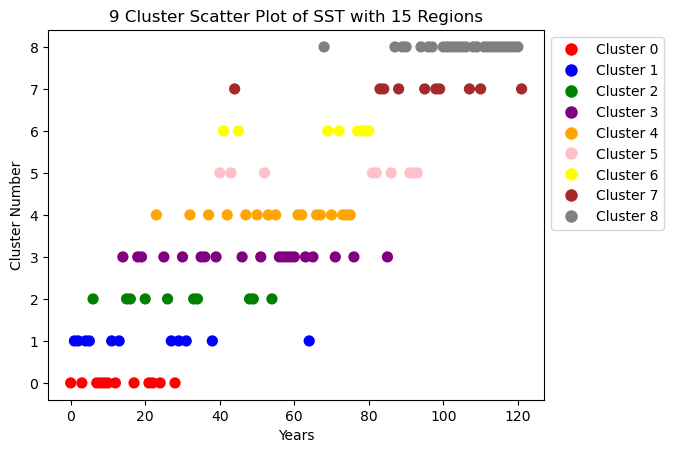

In [12]:
# Define a color map for your clusters
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange', 5: 'pink', 6: 'yellow', 7: 'brown', 8: 'gray'}

# Create a scatter plot
plt.scatter(cluster_9.index, cluster_9['Cluster Number'], c=cluster_9['Cluster Number'].map(colors), cmap='viridis', s=50)

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Cluster Number')
plt.title('9 Cluster Scatter Plot of SST with 15 Regions')

# Show the color legend
legend_labels = {cluster: color for cluster, color in colors.items() if cluster in cluster_9['Cluster Number'].unique()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', markerfacecolor=color, markersize=10) for cluster, color in legend_labels.items()]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

In [13]:
cluster7_1 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\SST 3 Extra Zones\SSTA 15 Regions 7 Cluster Number 1901-2010.csv",index_col=0)
cluster7_2 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\SST 3 Extra Zones\SSTA 15 Regions 7 Cluster Number 2011-2022 .csv",index_col=0)

In [14]:
cluster_7=pd.concat([cluster7_1,cluster7_2])
cluster_7=cluster_7.set_index(i for i in range(122))

In [15]:
cluster_7['Cluster Number'].unique()

array([5, 2, 4, 6, 1, 0, 3], dtype=int64)

In [16]:
cluster_7['Cluster Number'] = cluster_7['Cluster Number'].replace(0,10)
cluster_7['Cluster Number'] = cluster_7['Cluster Number'].replace(1,11)
cluster_7['Cluster Number'] = cluster_7['Cluster Number'].replace(2,12)
cluster_7['Cluster Number'] = cluster_7['Cluster Number'].replace(3,13)
cluster_7['Cluster Number'] = cluster_7['Cluster Number'].replace(4,14)
cluster_7['Cluster Number'] = cluster_7['Cluster Number'].replace(5,15)
cluster_7['Cluster Number'] = cluster_7['Cluster Number'].replace(6,16)

cluster_7['Cluster Number'] = cluster_7['Cluster Number'].replace(15,0)
cluster_7['Cluster Number'] = cluster_7['Cluster Number'].replace(12,1)
cluster_7['Cluster Number'] = cluster_7['Cluster Number'].replace(14,2)
cluster_7['Cluster Number'] = cluster_7['Cluster Number'].replace(16,3)
cluster_7['Cluster Number'] = cluster_7['Cluster Number'].replace(11,4)
cluster_7['Cluster Number'] = cluster_7['Cluster Number'].replace(10,5)
cluster_7['Cluster Number'] = cluster_7['Cluster Number'].replace(13,6)


C:\Users\ratho\AppData\Local\Temp\ipykernel_20244\2165652589.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_7.index, cluster_7['Cluster Number'], c=cluster_7['Cluster Number'].map(colors), cmap='viridis', s=100)  # Adjust 's' for marker size


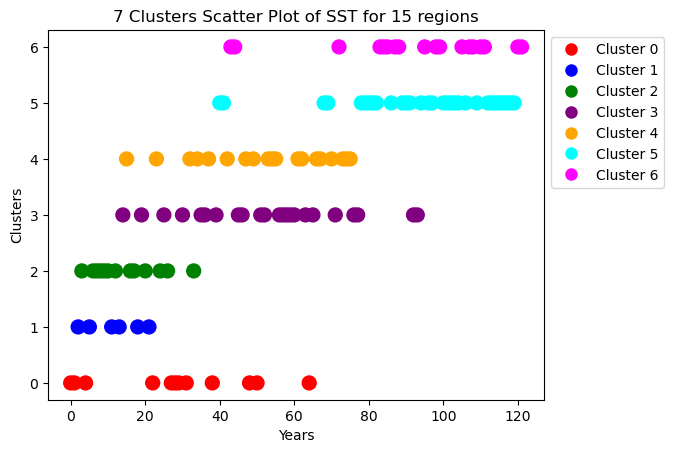

In [24]:
# Define a color map for your clusters
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange', 5: 'cyan', 6: 'magenta'}

# Create a scatter plot with larger markers (s parameter)
plt.scatter(cluster_7.index, cluster_7['Cluster Number'], c=cluster_7['Cluster Number'].map(colors), cmap='viridis', s=100)  # Adjust 's' for marker size

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Clusters')
plt.title('7 Clusters Scatter Plot of SST for 15 regions')

# Show the color legend
legend_labels = {cluster: color for cluster, color in colors.items() if cluster in cluster_7['Cluster Number'].unique()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', markerfacecolor=color, markersize=10) for cluster, color in legend_labels.items()]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

In [19]:
ssta1=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\SST 3 Extra Zones\SSTA Category 15 Regions 1901-2010.csv",index_col=0)
ssta2=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\SST 3 Extra Zones\SSTA Category 15 Region 2011-2022.csv",index_col=0)


In [20]:
ssta=pd.concat([ssta1,ssta2])
ssta=ssta.set_index(i for i in range(122))

In [21]:
mean_sst=ssta.mean(axis=1)

Text(0, 0.5, 'Category')

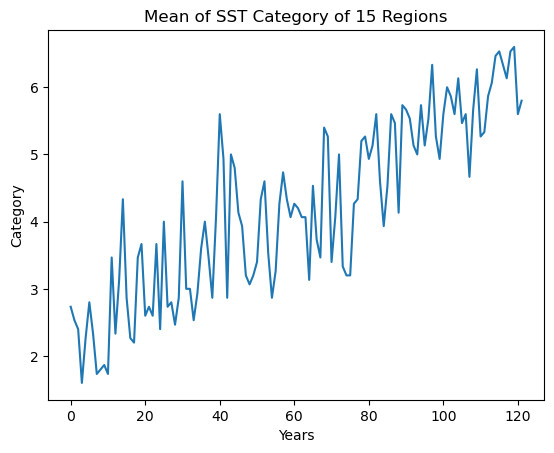

In [23]:
plt.plot(mean_sst)
plt.title("Mean of SST Category of 15 Regions")
plt.xlabel("Years")
plt.ylabel("Category")